Combine pymatgen.io.lammps and pymatgen-diffusion(https://github.com/materialsvirtuallab/pymatgen-diffusion) packages to parse lammps output files and plot the radial distribution function.

In [1]:
from pymatgen.io.lammps.output import LammpsRun
from pymatgen_diffusion.aimd.van_hove import RadialDistributionFunction

%matplotlib inline

In [2]:
lammpsrun = LammpsRun("test_files/nvt.data", 
                      "test_files/nvt.dump", 
                      "test_files/nvt.log",
                      is_forcefield=True)

# Get diffusion statistics summary

In [3]:
specie = "O"
temperature = 300.0
# Time step between measurements.
time_step = 1 
# Sampling frequency of the displacements 
#(time_step is multiplied by this number to get the real time between measurements)
step_skip = 1 
smoothed = None
min_obs = 30
avg_nsteps=1000

diffusion_analyzer = lammpsrun.get_diffusion_analyzer(specie, temperature, time_step, 
                                                      step_skip, smoothed=smoothed, 
                                                      min_obs=min_obs, avg_nsteps=avg_nsteps)
diffusion_analyzer.get_summary_dict()

{'D': 2.7852991306628059e-05,
 'D_components': [5.0000000000000005e-17,
  5.2488962237734645e-05,
  5.277636047174783e-05],
 'D_components_sigma': [5.576889206971694e-05,
  5.045351549490071e-06,
  1.6370889284437305e-06],
 'D_sigma': 1.9892419068032373e-05,
 'S': 22095.213906218967,
 'S_components': [3.9663987366701735e-08,
  41638.43070177582,
  41866.41790023805],
 'S_components_sigma': [44240.3326101641,
  4002.3752023908633,
  1298.6694915191879],
 'S_sigma': 15780.253172151452,
 'max_framework_displacement': 9.8003501786373288,
 'specie': 'O',
 'step_skip': 1,
 'temperature': 300.0,
 'time_step': 1}

# Compute and plot RDF

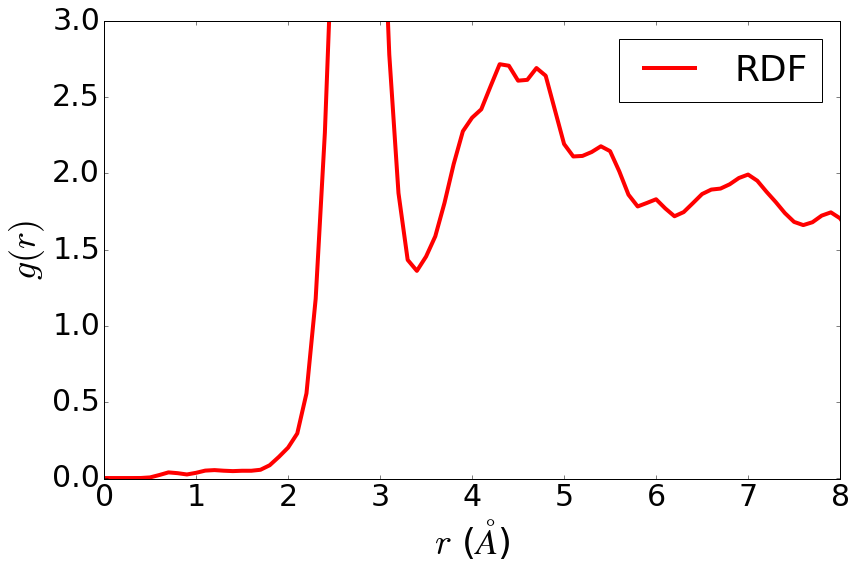

In [4]:
structure_list = [s for s in diffusion_analyzer.get_drift_corrected_structures()]

species = ["O"]
rdf = RadialDistributionFunction(structure_list, ngrid=101, rmax=10.0, cellrange=1, 
                                 sigma=0.1, species = species)
plt = rdf.get_rdf_plot(label="RDF")

# Plot running coordination number

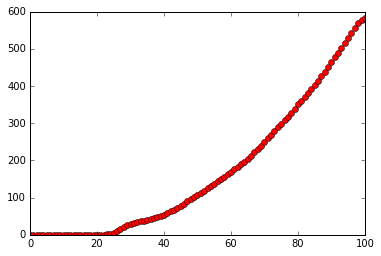

In [5]:
plt.plot(rdf.coordination_number, 'or')